In [1]:
import numpy as np
import emodnetchemistry
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from matplotlib.patches import Polygon

In [16]:
emodnetchemistry.Region()

TypeError: __init__() missing 6 required positional arguments: 'lonmin', 'lonmax', 'latmin', 'latmax', 'dlon', and 'dlat'

In [2]:
m = Basemap(projection='ortho',lon_0=5.,lat_0=45,resolution='c')

In [53]:
arctic = Region(-44.25, 70.0, 56.5, 83.0, 0.25, 0.125, "Arctic region")
atlantic = Region(-42.0, -0.1, 24.9, 48.0, 0.1, 0.1, "North-East Atlantic Ocean")
balticsea = Region(9.4, 30.9, 53.0, 65.9, 0.1, 0.1, "Baltic Sea")
blacksea = Region(26.5, 41.95, 40.0, 47.95, 0.05, 0.05, "Black Sea")
mediterranean = Region(-7.0, 36.375, 30.0, 45.875, 0.125, 0.125, "Mediterranean Sea")
northsea = Region(-5.4, 13.0, 47.9, 62.0, 0.1, 0.1, "North Sea")
regionlist = [arctic, atlantic, balticsea, blacksea, mediterranean, northsea]

In [18]:
dlon = .1
dlat = .1
regiondict = {"Arctic": [[-70., 70., 56.5, 83.]],
    "Baltic": [[9.4, 30.9, 53., 60.], [14. , 30.9, 60., 65.9]],
    "North Sea": [[-5.4, 13., 47.9, 62.]],
    "Mediterranean Sea": [[-0.8, 36.375, 30., 46.375], [-7,36.375, 30. ,43.]],
    "Black Sea":[[26.5, 41.95, 40., 47.95]]
             }

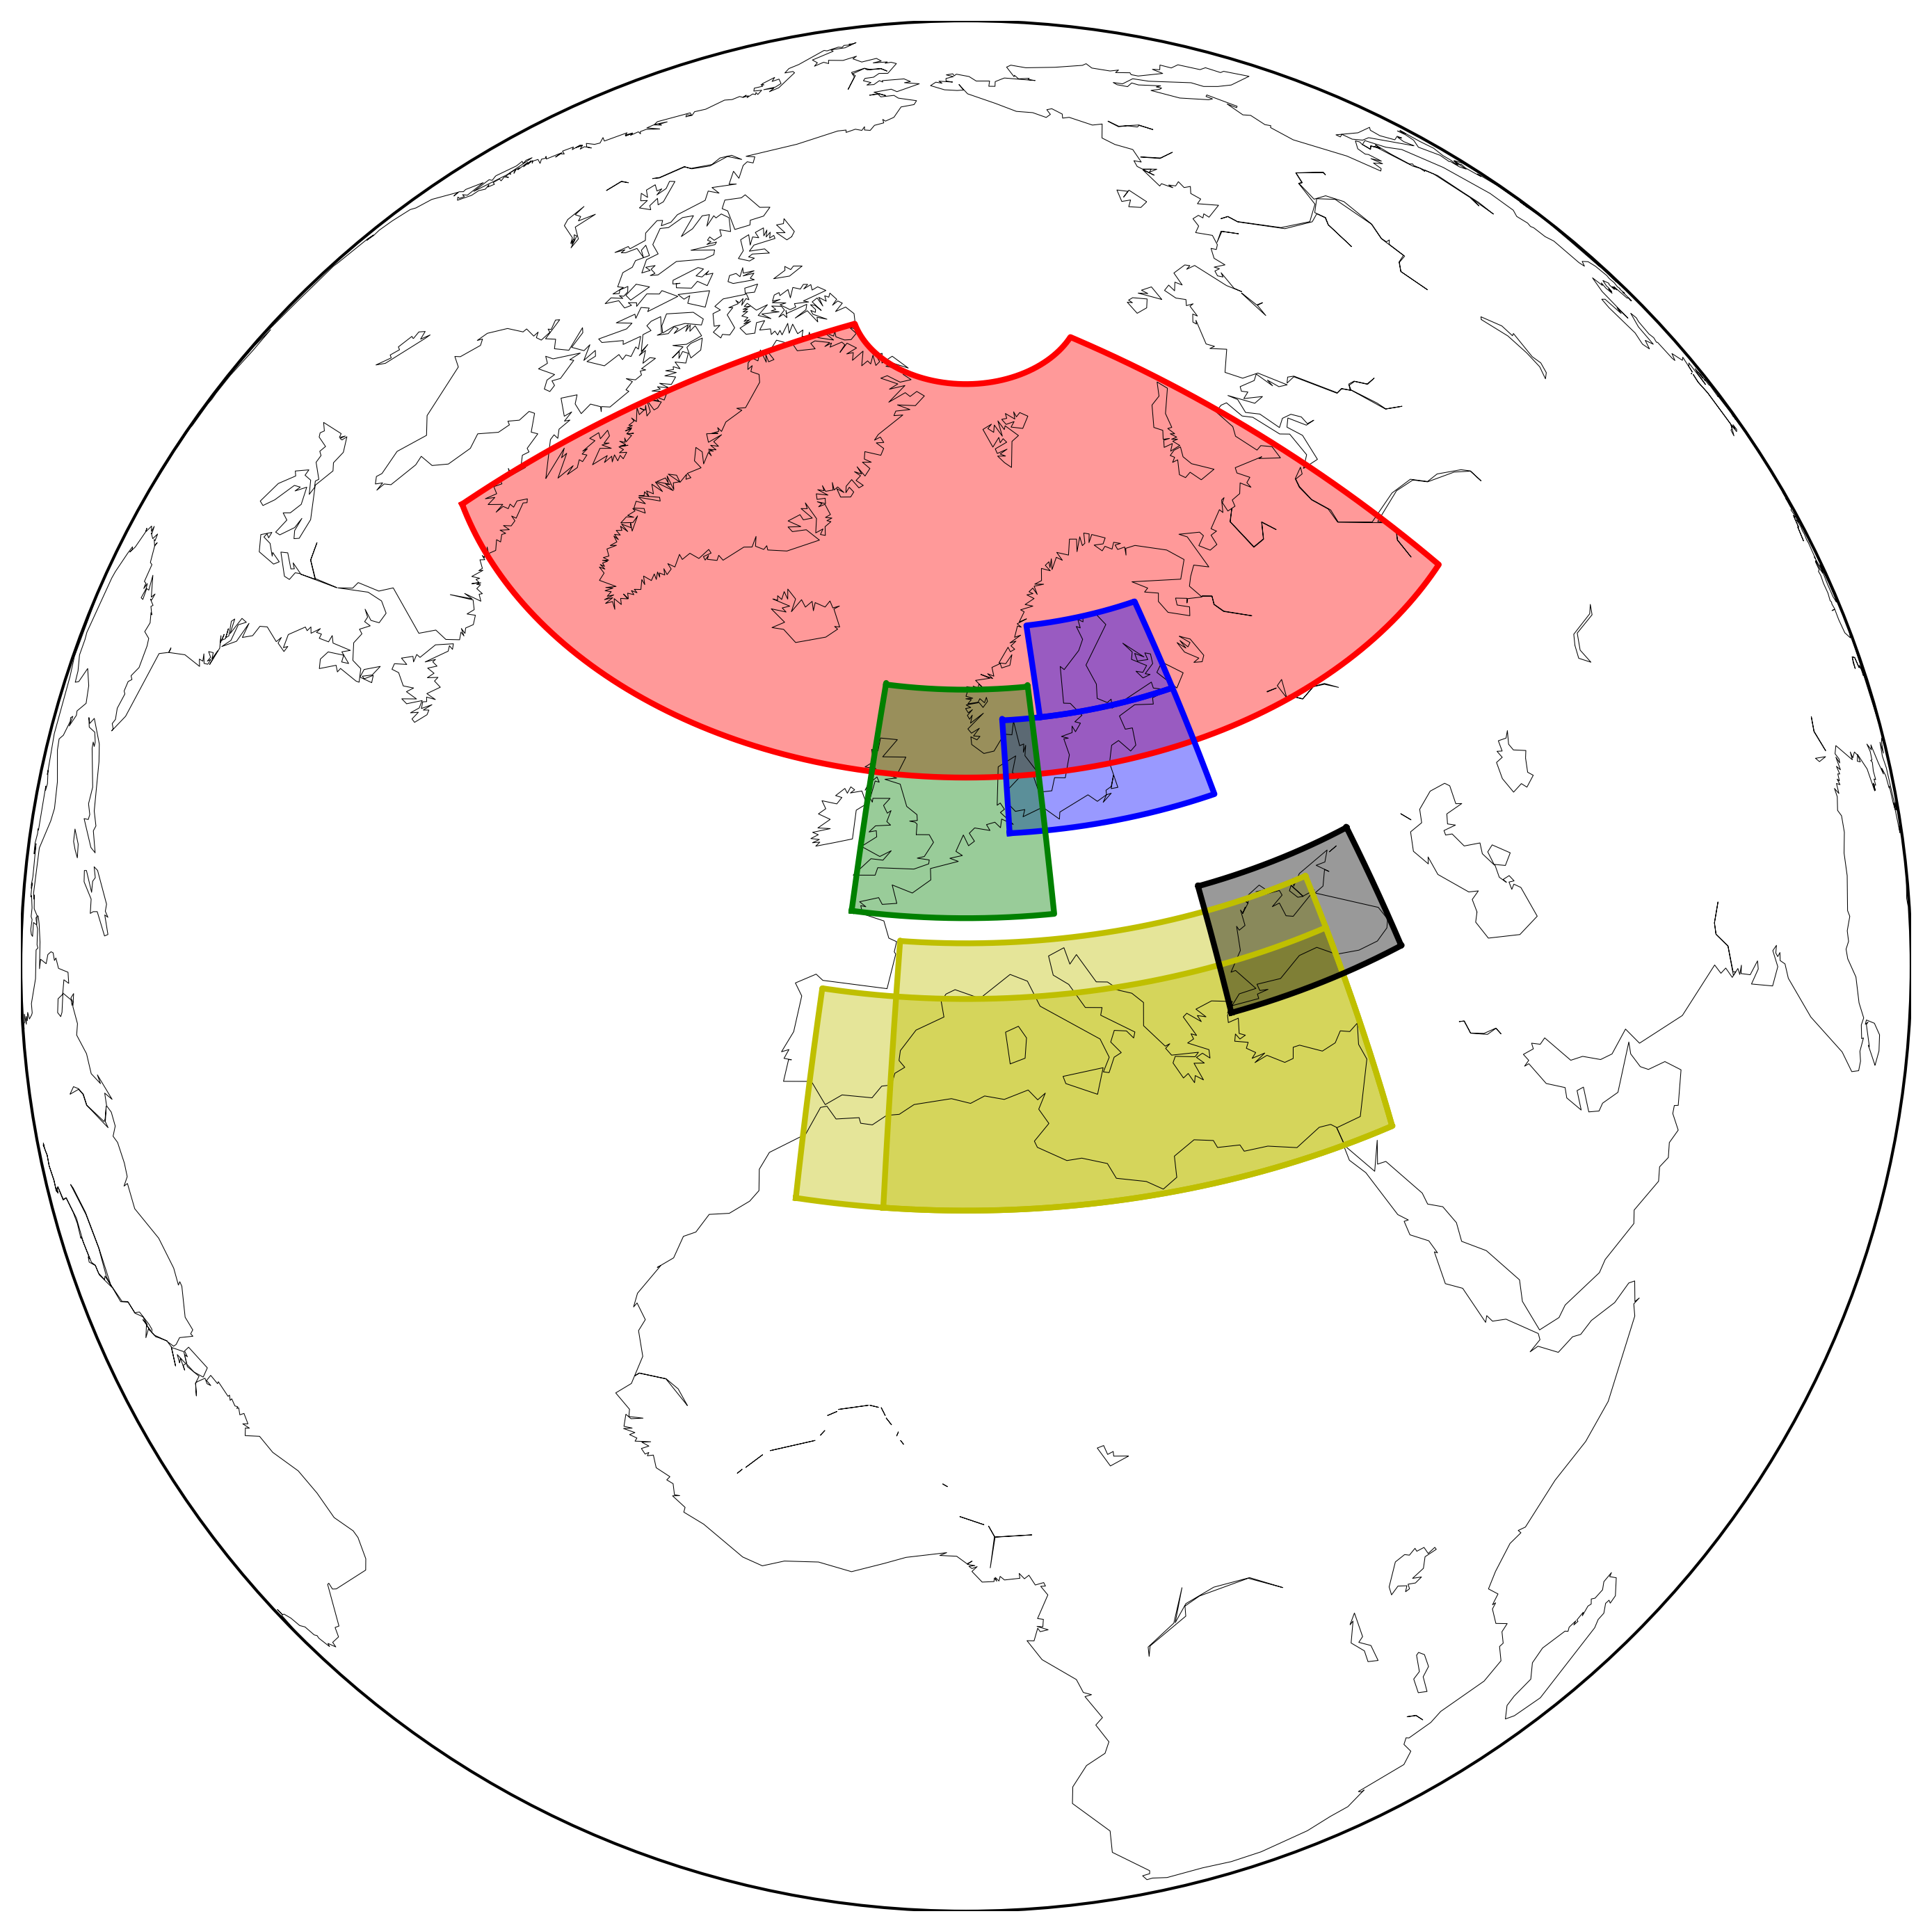

In [23]:
colorlist = ["r", "b", "g", "y", "k", "c"]
i = 0

fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
for regionname, domain in regiondict.items():
    color = colorlist[i]
    i += 1
    for dd in domain:
        lons = [dd[0], dd[1], dd[1], dd[0], dd[0]]
        lats = [dd[2], dd[2], dd[3], dd[3], dd[2]]
        region = emodnetchemistry.Region(dd[0], dd[1], dd[2], dd[3], dlon, dlat)
        region.get_rect_coords()
        region.get_rect_patch(m, facecolor=color, alpha=0.4)

        m.plot(region.lonvector, region.latvector, color=color, 
           latlon=True, label=region.name, linewidth=2)
        ax.add_patch(region.rect)
    
m.drawcoastlines(linewidth=.25)
    
plt.show()

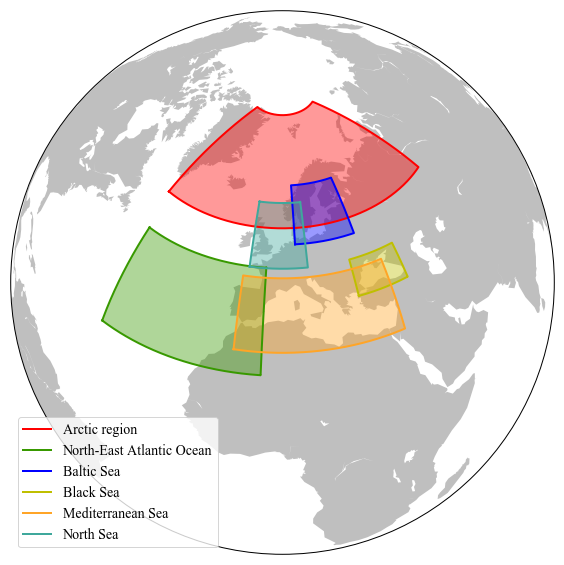

In [54]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
m.fillcontinents(color=".75")

colorlist = ["r", "#389900", "b", "y", "#FFA527", "#3FA89C"]
# Loop on the regions
for region, col in zip(regionlist, colorlist):
    region.get_rect_coords()
    region.get_rect_patch(m, facecolor=col, alpha=0.4)

    m.plot(region.lonvector, region.latvector, color=col, 
           latlon=True, label=region.name, linewidth=2)
    ax.add_patch(region.rect)
plt.legend(fontsize=14)
plt.savefig("../figures/EMODnet_domains05.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()